In [41]:
%matplotlib notebook
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import numpy as np
from utils.data_structures import DCEL, Line, Event
from utils.sweep import det, intersect, get_Event_from_intersection, check_intersection, r
from utils.algorithm import overlay_of_subdivision
from time import sleep
from blist import sortedset, sortedlist

Traceback (most recent call last):
  File "/home/twrdy/.local/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/home/twrdy/.local/lib/python3.7/site-packages/matplotlib/animation.py", line 1465, in _stop
    self.event_source.remove_callback(self._loop_delay)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [52]:
eps = 1e-5
def animate_intersection(i):
    global L, T, lines, Q, ax, intersections, fig
    e = 1e-14
    if i == 0:
        #dict of lines for O(1) eddting at intersection point
        L = dict()
        #set line determinant and epsilon for error
        Line.set_class(det,e)
        #fill T structure with start and end point events
        T = []
        for line in lines:
            l = Line(line) #convert line to Line structure
            T.append(Event(line[0],'start',l))
            T.append(Event(line[1],'end',l))
            L[l] = 1
            ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='black', linewidth=0.3)
                
                
        T = sortedlist(T) #timeline structure declaration
        Q = sortedset() #broom structure declaration
        #order of storing Lines in timeline structure
        Line.set_ordering(T[-1].position[0])
        #intersection points set
        intersections = set()
        
    if len(T) > 0:
        
        event = T.pop() #get most left event from x axis 
        
        ax.scatter(*event.position, color='black')
        
        #start of the Line case
        if event.event_type == 'start':
            
            ax.scatter(*event.position, color='green')
            
            Line.set_ordering(event.position[0])  #set order of storing Lines in timeline structure
            Q.add(event.line) #add Line to broom structure
            
            #check new possible intersections for line below and above newly added line
            b = Q.index(event.line) 
            b -= 1
            if b>=0 and b < len(Q):
                if abs(det(event.position, Q[b].get_line()[0], Q[b].get_line()[1])) < 1e-4 and (
                    r(event.position) != r(Q[b].get_line()[0]) and r(event.position) != r(Q[b].get_line()[1])):
                    intersections.add(event.position)
                    line = Q[b].get_line()
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='white', linewidth=0.5)
                    L[Q[b]] = 0
                    
                    line = [event.position, Q[b].get_line()[1]]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    
                    L[Line([event.position, Q[b].get_line()[1]])] = 1
                    
                    line = [Q[b].get_line()[0], event.position]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    L[Line([Q[b].get_line()[0], event.position])] = 1

                check_intersection(Q[b], event.line, T, Q)
            
            b += 2
            if b>=0 and b < len(Q):
                if abs(det(event.position, Q[b].get_line()[0], Q[b].get_line()[1])) < 1e-4 and (
                    r(event.position) != r(Q[b].get_line()[0]) and r(event.position) != r(Q[b].get_line()[1])):
                    intersections.add(event.position)
                    line = Q[b].get_line()
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='white', linewidth=0.5)
                    L[Q[b]] = 0
                    
                    line = [event.position, Q[b].get_line()[1]]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    
                    L[Line([event.position, Q[b].get_line()[1]])] = 1
                    
                    line = [Q[b].get_line()[0], event.position]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    L[Line([Q[b].get_line()[0], event.position])] = 1

                check_intersection(Q[b], event.line, T, Q)
            
            
        #end of Line case
        elif event.event_type == 'end':
            
            ax.scatter(*event.position, color='red')
            
            
            #check new possible intersections for line below and above lately deleted line
            k = Q.index(event.line)

            b = k
            b -= 1
            if b>=0 and b < len(Q):
                if abs(det(event.position, Q[b].get_line()[0], Q[b].get_line()[1])) < 1e-4 and (
                    r(event.position) != r(Q[b].get_line()[0]) and r(event.position) != r(Q[b].get_line()[1])):
                    intersections.add(event.position)
                    line = Q[b].get_line()
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='white', linewidth=0.5)
                    L[Q[b]] = 0
                    
                    line = [event.position, Q[b].get_line()[1]]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    
                    L[Line([event.position, Q[b].get_line()[1]])] = 1
                    
                    line = [Q[b].get_line()[0], event.position]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    L[Line([Q[b].get_line()[0], event.position])] = 1

            b += 2
            if b>=0 and b < len(Q):
                if abs(det(event.position, Q[b].get_line()[0], Q[b].get_line()[1])) < 1e-4 and (
                    r(event.position) != r(Q[b].get_line()[0]) and r(event.position) != r(Q[b].get_line()[1])): 
                    intersections.add(event.position)
                    line = Q[b].get_line()
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='white', linewidth=0.5)
                    L[Q[b]] = 0
                    
                    line = [event.position, Q[b].get_line()[1]]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    
                    L[Line([event.position, Q[b].get_line()[1]])] = 1
                    
                    line = [Q[b].get_line()[0], event.position]
                    ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=0.5)
                    L[Line([Q[b].get_line()[0], event.position])] = 1
            a = k+1
            b = k-1
            if a < len(Q) and b < len(Q) and a>=0 and b>=0:    
                check_intersection(Q[a], Q[b], T, Q)
            
            
            Q.discard(event.line) #delete line from broom structure            
            
        #intersection of two Lines case     
        else:
            #do not handle event that already occured 
            if not event.position in intersections:
                
                ax.scatter(*event.position, color='orange')
                
                #delete lines from structure
                L[event.line[0]] = 0
                L[event.line[1]] = 0
                #add four new lines to structure
                
                line = event.line[0].get_line()
                ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='white', linewidth=0.5)    
                
                line = event.line[1].get_line()
                ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='white', linewidth=0.5)   
                
                
                    
                # if event.line[0].get_line()[0][0] - event.line[0].get_line()[1][0] > 1e-9:
                L[Line([event.line[0].get_line()[0], event.position])] = 1
                L[Line([event.position, event.line[0].get_line()[1]])] = 1

                # if event.line[1].get_line()[0][0] - event.line[1].get_line()[1][0] > 1e-9:
                L[Line([event.line[1].get_line()[0], event.position])] = 1
                L[Line([event.position, event.line[1].get_line()[1]])] = 1
                
                line = [event.line[0].get_line()[0], event.position]
                ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=1)    
                line = [event.position, event.line[0].get_line()[1]]
                ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=1)
                line = [event.line[1].get_line()[0], event.position]
                ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=1)
                line = [event.position, event.line[1].get_line()[1]]
                ax.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], color='blue', linewidth=1)
                
                
                intersections.add(event.position) #add point to intersetion set


                #change Line ordering in broom set: s, s' = s', s 
                Q.discard(event.line[0])
                Q.discard(event.line[1])

                Line.set_ordering(event.position[0])            
                Line.ordering_x += 1e-5
                Q.add(event.line[0])
                Q.add(event.line[1])


                #check new possible intersections
                k = Q.index(event.line[0])
                m = Q.index(event.line[1])

                if k > m:
                    k , m = m , k

                if m >= 0 and m+1 < len(Q) and m+1 != k:
                    check_intersection(Q[m],Q[m+1],T, Q)
                if k-1 >= 0 and k < len(Q) and k-1 != m:
                    check_intersection(Q[k],Q[k-1],T, Q)

In [59]:
def preprocess_verices(v1, v2):
    vectors = [
        [eps, eps],
        [eps,-eps],
        [-eps,-eps],
        [-eps,eps]
    ]

    def get_direction_of_line(beg, end):
        return (0 if end[0] - beg[0] > 0 else 2) + (1 if end[1] - beg[1] < 0 else 0)
    
    if v1 > v2:
        v1, v2 = v2, v1

    vec = vectors[get_direction_of_line(v1, v2)]

    v1 = list(v1)
    v2 = list(v2)

    a = (v1[1]-v2[1])/(v1[0]-v2[0])
    b = (v1[1]-a*v1[0])

    v1[0] += vec[0]
    v1[1] = (a*v1[0] + b)
    v2[0] -= vec[0]
    v2[1] = (a*v2[0] + b)

    v1 = tuple(v1)
    v2 = tuple(v2)
    return v1, v2

### Animacja algorytmu została przygotowana dla 4 zbiorów testowy, 3 są małe aby zobaczyć dokładny sposób działania algorytmu, natomiast 4 zbiór zawiera wszystkie przypadki, które należało uwzględnić przy projektowaniu algorytmu

### Pierwszy zbiór

<IPython.core.display.Javascript object>


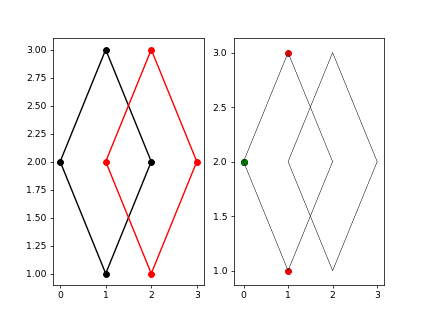

In [64]:
plt.close()

w = [(1,1), (2,2), (1,3), (0,2)]
v = [(2, 1), (3, 2), (2, 3), (1, 2)]
w_e = [[0, 1], [1, 2], [2, 3], [0, 3]]
v_e = [[0, 1], [1, 2], [2, 3], [0, 3]]

lines = []
S1_lines = []
for edge in S1.el:
    v1 = S1.vl[edge[0]]
    v2 = S1.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S1_lines.append([v1, v2])
    lines.append([v1, v2])

S2_lines = []  
for edge in S2.el:
    v1 = S2.vl[edge[0]]
    v2 = S2.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S2_lines.append([v1, v2])
    lines.append([v1, v2])

S1, S2 = DCEL(w, w_e), DCEL(v, v_e)

fig = plt.figure()
ax = fig.add_subplot(1,2,2)
bx = fig.add_subplot(1,2,1)

for line in S1_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='black', marker='o')
    
for line in S2_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='red', marker='o')

animation.FuncAnimation(fig, animate_intersection, frames=200, interval=500, repeat=True)

### Drugi zbiór

<IPython.core.display.Javascript object>


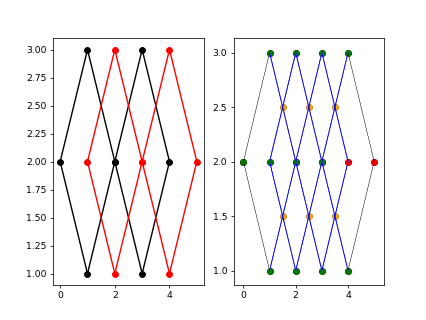

In [67]:
plt.close()

w = [(1,1), (2,2), (1,3), (0,2), (1,1)]
v = [(x[0] + 2, x[1]) for x in w]
w += v
v = [(x[0] + 1, x[1]) for x in w]
w_e = [[i, i+1] for i in range(len(w)-1) if i != 4]
v_e = [[i, i+1] for i in range(len(v)-1) if i != 4]

lines = []
S1_lines = []
for edge in S1.el:
    v1 = S1.vl[edge[0]]
    v2 = S1.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S1_lines.append([v1, v2])
    lines.append([v1, v2])

S2_lines = []  
for edge in S2.el:
    v1 = S2.vl[edge[0]]
    v2 = S2.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S2_lines.append([v1, v2])
    lines.append([v1, v2])

S1, S2 = DCEL(w, w_e), DCEL(v, v_e)

fig = plt.figure()
ax = fig.add_subplot(1,2,2)
bx = fig.add_subplot(1,2,1)

for line in S1_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='black', marker='o')
    
for line in S2_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='red', marker='o')

animation.FuncAnimation(fig, animate_intersection, frames=200, interval=300, repeat=True)

### Trzeci zbiór

<IPython.core.display.Javascript object>


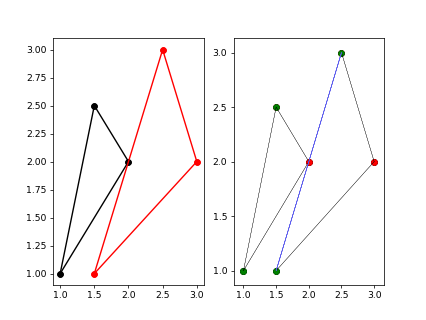

In [69]:
plt.close()

w = [(1,1), (2,2), (1.5, 2.5), (1,1)]
w_e = [[i, i+1] for i in range(len(w)-1) if i != 4]
v = [(1.5, 1), (2.5, 3), (3,2), (1.5,1)]
v_e = [[i, i+1] for i in range(len(v)-1) if i != 4]

lines = []
S1_lines = []
for edge in S1.el:
    v1 = S1.vl[edge[0]]
    v2 = S1.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S1_lines.append([v1, v2])
    lines.append([v1, v2])

S2_lines = []  
for edge in S2.el:
    v1 = S2.vl[edge[0]]
    v2 = S2.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S2_lines.append([v1, v2])
    lines.append([v1, v2])

S1, S2 = DCEL(w, w_e), DCEL(v, v_e)

fig = plt.figure()
ax = fig.add_subplot(1,2,2)
bx = fig.add_subplot(1,2,1)

for line in S1_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='black', marker='o')
    
for line in S2_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='red', marker='o')

animation.FuncAnimation(fig, animate_intersection, frames=200, interval=300, repeat=True)

### Czwart zbiór

<IPython.core.display.Javascript object>


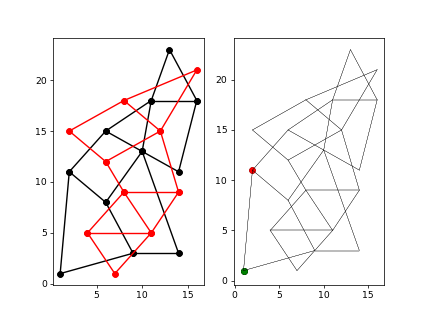

In [72]:
plt.close()

w = [(1,1),(9,3),(14,3),(6,8),(2,11),(6,15),(10,13),(14,11),(11,18),(16,18),(13,23)]
w_e = [[0, 1],[1, 2],[1, 3],[0, 4],[2, 6],[3, 4],[3, 6],[4, 5],[7, 6],[7, 9],[6, 5],[6, 8],[5, 8],[8, 9],[8, 10],[9, 10]]
v = [(7,1),(4,5),(11,5),(8,9),(14,9),(6,12),(2,15),(12, 15),(8 , 18),(16, 21)]
v_e = [[0,1],[0,2], [1,2],[1,3],[2,3],[2,4],[3,4],[3,5],[4, 7],[5 ,7],[5,6],[6,8],[7, 8],[7,9],[8,9]]

lines = []
S1_lines = []
for edge in S1.el:
    v1 = S1.vl[edge[0]]
    v2 = S1.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S1_lines.append([v1, v2])
    lines.append([v1, v2])

S2_lines = []  
for edge in S2.el:
    v1 = S2.vl[edge[0]]
    v2 = S2.vl[edge[1]]
    v1, v2 = preprocess_verices(v1, v2)
    S2_lines.append([v1, v2])
    lines.append([v1, v2])

S1, S2 = DCEL(w, w_e), DCEL(v, v_e)

fig = plt.figure()
ax = fig.add_subplot(1,2,2)
bx = fig.add_subplot(1,2,1)

for line in S1_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='black', marker='o')
    
for line in S2_lines:
    x, y = [x[0] for x in line], [y[1] for y in line]
    bx.plot(x, y, color='red', marker='o')

animation.FuncAnimation(fig, animate_intersection, frames=200, interval=300, repeat=True)